In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\r.bennetayeb\AppData\Local\Temp\ipykernel_25332\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [1]:
%matplotlib notebook
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

C:\Users\e2302355\.conda\envs\projet\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 25.4k/25.4k [00:00<00:00, 23.9MB/s]

Extracting files...
Path to dataset files: C:\Users\e2302355\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [3]:
# Répertoire cible dans votre projet
project_dir = r"H:\SD3\SAE6"

# Créer le répertoire (si nécessaire)
os.makedirs(project_dir, exist_ok=True)

# Copier le fichier depuis le cache au répertoire du projet
cache_file = r"C:\Users\e2302355\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1\ds_salaries.csv"
shutil.copy(cache_file, project_dir)

'H:\\SD3\\SAE6\\ds_salaries.csv'

In [7]:
# Lire le fichier depuis le répertoire du projet
data = pd.read_csv(cache_file)
display(data)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [10]:
#données manquantes 
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


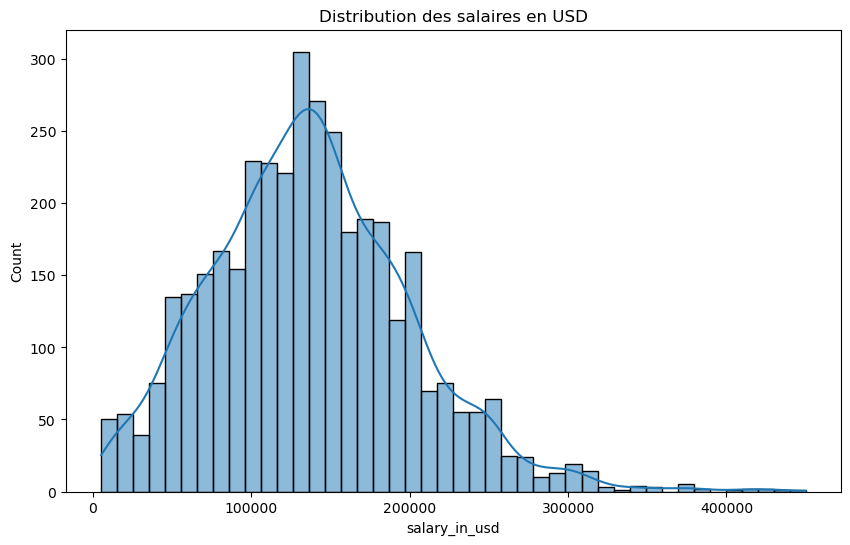

In [16]:
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], kde=True)
plt.title('Distribution des salaires en USD')
plt.show()

In [18]:
# liste des pays concerné par l'étude 
pays = data['employee_residence'].unique()
print(f"\nNombre de pays étudiés : {len(pays)}")
print(pays)


Nombre de pays étudiés : 78
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


In [21]:
#Salaire moyen par rôle
print("\n--- Salaire moyen par rôle ---")
print(data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)) 

# Salaire moyen par pays
print("\n--- Salaire moyen par pays ---")
print(data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False))
# Salaires moyens par niveau d'expérience
print("\n--- Salaire moyen par niveau d'experience ---")
print(data.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False))


--- Salaire moyen par rôle ---
job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

--- Salaire moyen par pays ---
company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64

--- Salaire moyen par niveau d'experience ---
experience_level
EX    194930.929825
SE    153051.071542
MI   

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [23]:
# Filtrer les salaires pour un pays donné (ex : US)
salaires_us = data[data['employee_residence'] == 'US']
print(salaires_us)

      work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence 

In [25]:
# Top 5 des entreprises qui paient le plus
top_5_pays = data.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print("Top 5 des pays avec les meilleurs salaires moyens :")
print(top_5_pays)

Top 5 des pays avec les meilleurs salaires moyens :
company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: salary_in_usd, dtype: float64


In [29]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
hauts_salaires = data[data['salary_in_usd'] > 100000][['job_title', 'salary_in_usd']]
print(f"Nombre d'employés gagnant plus de 100k USD : {len(hauts_salaires)}")
print(hauts_salaires)
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
top_remote_pays = data[data['remote_ratio'] == 100]['employee_residence'].value_counts()
print("Top 5 des pays pratiquant le plus le télétravail (100%) :")
print(top_remote_pays)

Nombre d'employés gagnant plus de 100k USD : 2665
                               job_title  salary_in_usd
3                         Data Scientist         175000
4                         Data Scientist         120000
5                      Applied Scientist         222200
6                      Applied Scientist         136000
7                         Data Scientist         219000
...                                  ...            ...
3747  Applied Machine Learning Scientist         423000
3749                     Data Specialist         165000
3750                      Data Scientist         412000
3751            Principal Data Scientist         151000
3752                      Data Scientist         105000

[2665 rows x 2 columns]
Top 5 des pays pratiquant le plus le télétravail (100%) :
employee_residence
US    1302
GB      61
CA      45
IN      39
ES      25
DE      17
BR      16
FR      15
GR      12
MX       9
PT       8
NL       8
PL       6
AR       6
AU       6
NG       5


In [32]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
moyenne_remote = data[data['remote_ratio'] == 100]['salary_in_usd'].mean()
print(f"Salaire moyen en télétravail (100%) : {moyenne_remote:.2f}USD ")
# Comparer salaires moyens pour deux catégories


Salaire moyen en télétravail (100%) : 136481.45USD 


In [16]:
# Ajouter une colonne pour les fourchettes de salaires



Données avec fourchettes de salaires :    salary_in_usd salary_range
0          85847     50k-100k
1          30000         <50k
2          25500         <50k
3         175000        150k+
4         120000    100k-150k
Pays avec les salaires moyens les plus élevés : employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    152822.011651
CA    132222.905882
Name: salary_in_usd, dtype: float64


In [ ]:
# Analyse des corrélations
# Relation entre télétravail et salaire


In [ ]:
# Salaire moyen par taille d'entreprise


In [ ]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = data.pivot_table(
    index='', 
    columns='', 
    values='', 
    aggfunc=''
)
print("Tableau croisé des salaires :", pivot_table)